# Scattering Rayleigh

## Introduccion

En un tejido biológico existen una gran variedad de estructuras (núcleos celuares células, fibras de colágeno, estructuras  lipídicas...) cuyos tamaños varían desde los nm hasta las  10 o 20 $\mu$m

![casos_Scattering](figscatteringrayleigh_1.png)

Dependiendo del tamño de las partículas de scattering $d$ comparado con la longitud de onda de la radiación incidente se pueden dar dos casos extremos de scattering:
* **Scattering Rayleigh**: si  $d \ll \lambda$.
* **Scattering Mie**: si $d  > \lambda$ 

![casos_Scattering](figscatteringrayleigh_2.png)

## Scattering Rayleigh

![Scattering2](figscatteringrayleigh_3.png)

Vamos a representar el coeficiente de scattering Rayleigh para el caso de una partícula de diámetro $d= 50 \mu$m, en función de la longitud de onda con los datos que se dan a continuacion:

Supongamos que una onda colimada de longitud de onda $\lambda = 400$ nm se dirige a un medio formado por particulas esfericas de diametro $d$, e indice de refraccion $n = 1.57$, contenidas en agua
(densidad $\rho = 1$ g/cm$^3$)cuyo indice es 1.33. La densidad de la esfera es $\rho_s = 1.05$ g/cm$^3$. La concentracion de esferas en la disolucion es $C = 10^{-5}$ en peso. La teoria de Rayleigh 
permite calcular el coeficiente de scattering como:

$$\mu_s = \rho_s \sigma_s$$

Donde $\rho_s$ representa la densidad de los centros de absorcion y $\sigma_s$ la seccion eficaz de scatterind dada por

$$\sigma_s = \frac{8 \pi a^2 x^4}{3}\left(\frac{n_r^2 -1}{n_r^2 +2} \right)^2$$

En esta expresion $a$ es el radio de la particula esferica, $x$ el denominado factor de forma y $n_r$ el indice relativo, dados por, 

$$k = \frac{2 \pi}{\lambda} n_m$$
$$x = k a$$
$$ n_r = \frac{n_s}{n_m}$$

Considerando que la densidad de la disolucion es la del agua,

* (a) Calcular la densidad de centros de dispersion, la seccion eficaz, el factor de eficiencia de scattering y el 
coeficiente de scattering $\mu_s$ para 3 diametros de particula: $d = 20, 50 \; y \; 70$ nm.

* (b) Calcular el coeficiente de scattering en funcion de la longitud de onda para el intervalo $[400,1000]$ nm y 
diametros 20, 50 y 70 nm.


(a) densidad de centros de scattering =  2.2736420441699333e+18  para  20  nm
(a) seccion eficaz =  2.1455067158371883e-20 m^2  para  20  nm
(a) coef. de scattering =  0.0004878114275176385  cm-1 para  20  nm
(a) densidad de centros de scattering =  1.455130908268757e+17  para  50  nm
(a) seccion eficaz =  5.238053505461887e-18 m^2  para  50  nm
(a) coef. de scattering =  0.007622053554963103  cm-1 para  50  nm
(a) densidad de centros de scattering =  5.302955205061068e+16  para  70  nm
(a) seccion eficaz =  3.944011243930146e-17 m^2  para  70  nm
(a) coef. de scattering =  0.020914914954818745  cm-1 para  70  nm


(400, 1000)

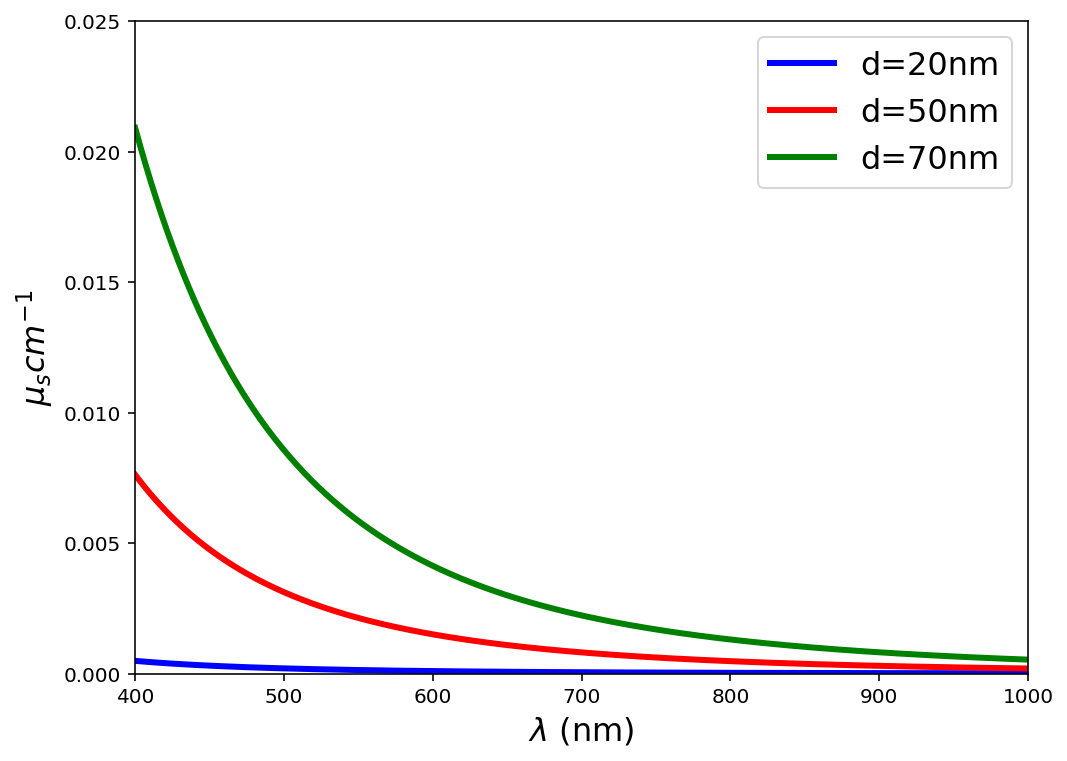

In [25]:
#Este programa calcula el coeficiente de scattering Rayleigh en función de la longitud de onda
import numpy as np
import matplotlib.pyplot as plt

DD=np.array([20,50,70])*1e-9; #diámetro de las partículas
DDtext = ['20','50','70']
fig = plt.figure(figsize=(8,6))
for jj,diametro in enumerate(DD):
    a=diametro/2; #radio de la partícula
    if (jj==0):
        color='b'
        leg1='d=' + DDtext[jj] + 'nm'
    elif (jj==1):
        color='r';
        leg2='d='+ DDtext[jj] + 'nm'
    elif (jj==2):
        color='g'
        leg3='d=' + DDtext[jj] + 'nm'
    n_s=1.57; #indice de la partícula esferica
    n_b=1.33; #indice del entorno
    n_rel= n_s/n_b #indice relativo
    
    w_s= 1.05e3 # densidad de la partícula esferica a en gramos/litro
    w_b=1.00e3 #densidad del agua
    C_s=1e-5 #concentracion en peso de la disolución de partículas
    landa1=400e-9 #primer valor del intervalo de landas
    landa2=1000e-9 #último valor del intervalo de  landas
    Landas=np.linspace(landa1,landa2,500) #vector de posibles landas
    vol_s=4*np.pi/3*a**3; #volumen de la esfera en m^3
    rho_s=C_s*w_b/(vol_s*w_s); #Densidad de centros de scattering (masa de todas las esferas por unidad de volumen)
    print('(a) densidad de centros de scattering = ', rho_s, ' para ', DDtext[jj], ' nm')
    k=2*np.pi*n_b/Landas # numero de onda 
    x=k*a; # parametro de impacto
    sigma_s=8*np.pi/3*a**2*x**4*((n_rel**2 -1)/(n_rel**2 +2))**2  #seccion eficaz en m^2
    print('(a) seccion eficaz = ', sigma_s[0], 'm^2  para ', DDtext[jj], ' nm')
    mu_s=(rho_s*1e-2)*sigma_s #Coeficiente de scattering en cm-1
    print('(a) coef. de scattering = ', mu_s[0], ' cm-1 para ', DDtext[jj], ' nm')
    plt.plot(Landas*1e9,mu_s,color,linewidth=3);
    plt.xlabel('$\lambda$ (nm)',fontsize=16);
    plt.ylabel('$\mu_{s} cm^{-1}$',fontsize=16);
plt.legend((leg1, leg2, leg3),fontsize=16)
plt.ylim(0,0.025)
plt.xlim(400,1000)